Genera una libreta en Google Colab, cuya estructura esté basada en los análisis solicitados.

# Reto: Explorando el índice de felicidad

Guarda en un dataframe (happiness) todos los registros del archivo Happiness_report.csv.

In [3]:
from google.colab import files
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
uploaded = files.upload()

Saving 0.9ep3krj7s1o0.ona2jvufk4mMetadata.csv to 0.9ep3krj7s1o0.ona2jvufk4mMetadata.csv
Saving 0.rw6r6mdtjng0.9sxn8dzeqsbHappiness_report.csv to 0.rw6r6mdtjng0.9sxn8dzeqsbHappiness_report.csv


In [5]:
#Dataframe happinesss

happiness = pd.read_csv('0.rw6r6mdtjng0.9sxn8dzeqsbHappiness_report.csv')
happiness.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


A partir del dataframe happiness obtén otro (mexico) donde únicamente almacenes la información de México. Haz que la columna Country or region quede como índice.

In [6]:
#Aunque no lo dice quitaré el overall rank por que pierde sentido tenerlo si solo se trata de México
mexico = happiness[happiness['Country or region'] == 'Mexico']
mexico = mexico.drop('Overall rank', axis=1)
mexico = mexico.set_index('Country or region')
mexico

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,,
Mexico,6.595,1.07,1.323,0.861,0.433,0.074,0.073


Obtén un histograma del puntaje (score) para identificar el rango o clase más frecuente. Ubica el valor de México con una etiqueta de texto.

Text(6.795, 5, 'México\nScore: 6.59')

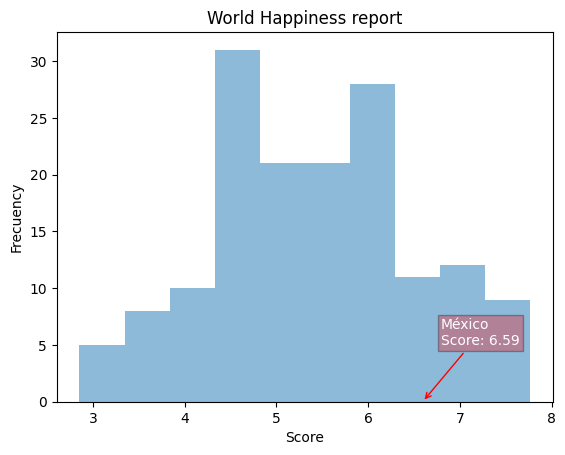

In [7]:
#Me pareció relevante agregar el score de méxico
plt.hist(happiness['Score'], bins=10, alpha=0.5)
plt.title('World Happiness report')
plt.xlabel('Score')
plt.ylabel('Frecuency')
mex_value = happiness.loc[happiness['Country or region']=='Mexico','Score'].to_list()[0]
plt.annotate(f'México\nScore: {mex_value:.2f}', color = 'white',xy=(mex_value, 0),xytext=(mex_value+0.2,5),arrowprops=dict(arrowstyle='->',color='red'),bbox=dict(facecolor='red',alpha=0.3,pad=2))

Construye un boxplot para la columna esperanza de vida (Healthy life expectancy). Ubica el valor de México con una anotación.

<ipython-input-8-818416013c68>:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(happiness['Healthy life expectancy'].dropna(), labels= ['Healthy life expectancy'], vert=True)


Text(1.2, 0.861, 'México\n: 0.86')

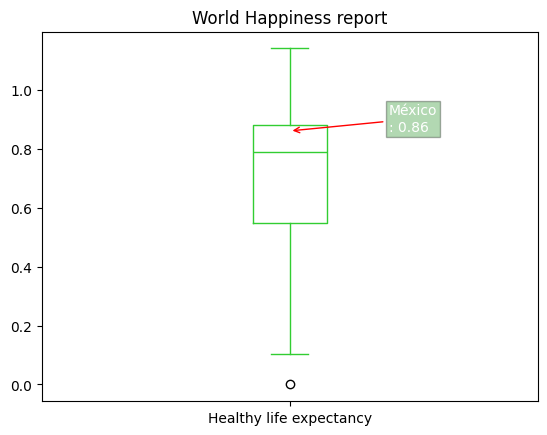

In [8]:
box = plt.boxplot(happiness['Healthy life expectancy'].dropna(), labels= ['Healthy life expectancy'], vert=True)
plt.title('World Happiness report')

for element in ['boxes', 'whiskers', 'caps', 'medians']:
    for item in box[element]:
        item.set_color('limegreen')

mex_value = happiness.loc[happiness['Country or region']=='Mexico','Healthy life expectancy'].to_list()[0]
plt.annotate(f'México\n: {mex_value:.2f}', color = 'white',xy=(1,mex_value),xytext=(1.2,mex_value),arrowprops=dict(arrowstyle='->',color='red'),bbox=dict(facecolor='green',alpha=0.3,pad=2))

Crea una gráfica circular para analizar en qué medida los factores contribuyen a evaluar la felicidad en México.

In [9]:
mexico1 = mexico.drop(['Score'], axis=1)
mexico1t = mexico1.transpose()
mexico1t.rename(columns={'Mexico': 'factor'}, inplace=True)
mexico1t

Country or region,factor
GDP per capita,1.070
Social support,1.323
Healthy life expectancy,0.861
Freedom to make life choices,0.433
Generosity,0.074
Perceptions of corruption,0.073


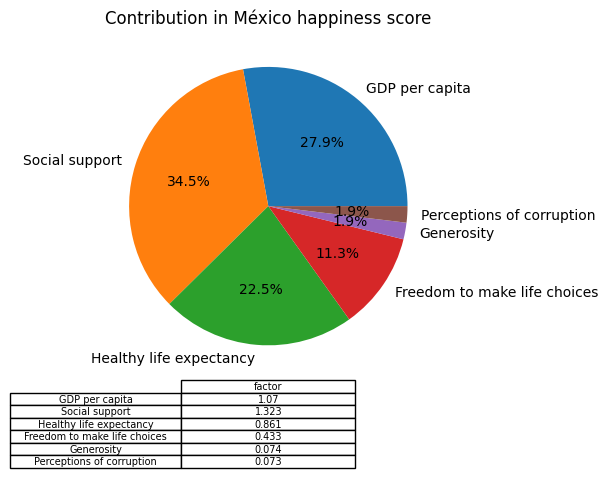

In [10]:
#No estaba seguro si quería aquí poner una tabla dentro de la gráfica
fig, ax = plt.subplots(figsize=(6, 6))

mexico1t.plot.pie(y='factor', labels = mexico1t.index, ax = ax, legend = False, autopct='%1.1f%%', rotatelabels = False)
plt.title('Contribution in México happiness score')
plt.ylabel("")

mexicotabla = plt.table(cellText = mexico1t.values, rowLabels= mexico1t.index, colLabels= mexico1t.columns, cellLoc= 'center', rowLoc= 'center', loc= 'bottom')
mexicotabla.auto_set_font_size(False)
mexicotabla.set_fontsize(7)

mexicotabla.scale(0.5, 1)
plt.subplots_adjust(left=0.2, bottom= 0.3)


Filtra el dataframe para quedarte con 5 países (el más feliz, el menos feliz, México y dos más de tu interés) y visualiza en una misma gráfica los 6 factores.

In [11]:
min = happiness[happiness['Score'] == happiness['Score'].min()]
max = happiness[happiness['Score'] == happiness['Score'].max()]

In [12]:
min

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
155,156,South Sudan,2.853,0.306,0.575,0.295,0.01,0.202,0.091


In [13]:
max

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.34,1.587,0.986,0.596,0.153,0.393


In [14]:
happiness_5 = happiness[(happiness['Country or region'] == 'Mexico') |
                       (happiness['Country or region'] == 'South Sudan') |
                       (happiness['Country or region'] == 'Finland') |
                       (happiness['Country or region'] == 'United States') |
                       (happiness['Country or region'] == 'Canada')]

happiness_5.drop(['Overall rank', 'Score'], axis=1, inplace=True)
happiness_5.set_index('Country or region', inplace=True)
happiness_5

<ipython-input-14-665854bb243c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  happiness_5.drop(['Overall rank', 'Score'], axis=1, inplace=True)


,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,
Finland,1.340,1.587,0.986,0.596,0.153,0.393
Canada,1.365,1.505,1.039,0.584,0.285,0.308
United States,1.433,1.457,0.874,0.454,0.280,0.128
Mexico,1.070,1.323,0.861,0.433,0.074,0.073
South Sudan,0.306,0.575,0.295,0.010,0.202,0.091


<Axes: title={'center': 'World happiness reporte'}>

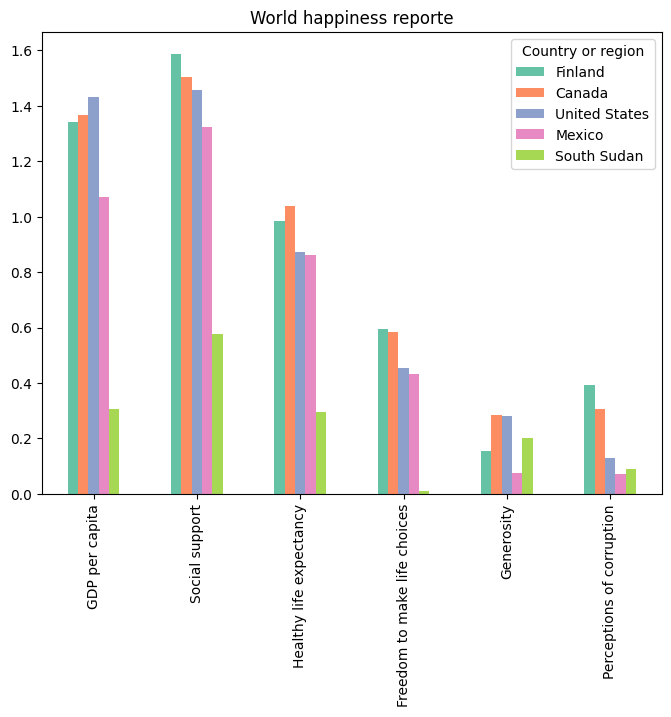

In [15]:
col=sns.color_palette("Set2")
happiness_5.T.plot.bar(title='World happiness reporte', ylabel='', xlabel='',figsize=(8,6), color=col)


Crea una matriz de subgráficas de 2 x 3 con scatter plots del puntaje (score) versus los 6 factores, para determinar qué factor influye más en la evaluación.

In [20]:
happiness.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

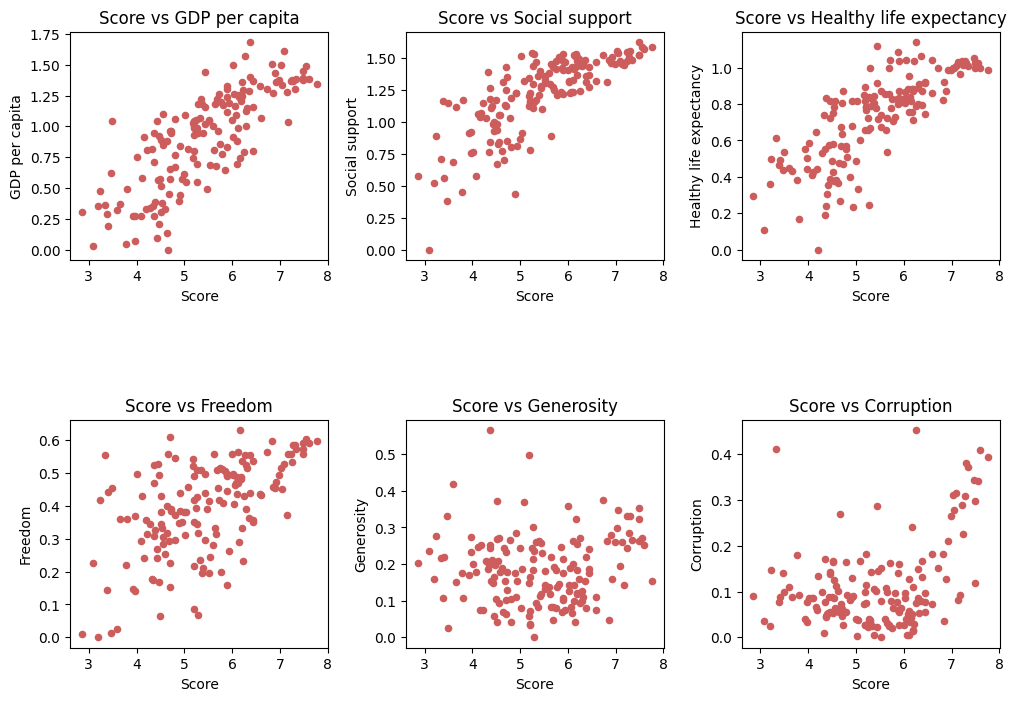

In [31]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
plt.subplots_adjust(wspace=0.3, hspace=0.7)

# GDP
happiness.plot(kind='scatter', x='Score', y='GDP per capita', color='indianred', ax=axes[0, 0])
axes[0, 0].set_title('Score vs GDP per capita')
axes[0, 0].set_xlabel('Score')
axes[0, 0].set_ylabel('GDP per capita')

# SOCIAL SUPPORT
happiness.plot(kind='scatter', x='Score', y='Social support', color='indianred', ax=axes[0, 1])
axes[0, 1].set_title('Score vs Social support')
axes[0, 1].set_xlabel('Score')
axes[0, 1].set_ylabel('Social support')

# HEALTHY EXPECTANCY
happiness.plot(kind='scatter', x='Score', y='Healthy life expectancy', color='indianred', ax=axes[0, 2])
axes[0, 2].set_title('Score vs Healthy life expectancy')
axes[0, 2].set_xlabel('Score')
axes[0, 2].set_ylabel('Healthy life expectancy')

# FREEDOM TO MAKE LIFE CHOICES
happiness.plot(kind='scatter', x='Score', y='Freedom to make life choices', color='indianred', ax=axes[1, 0])
axes[1, 0].set_title('Score vs Freedom')
axes[1, 0].set_xlabel('Score')
axes[1, 0].set_ylabel('Freedom')

# GENEROSITY
happiness.plot(kind='scatter', x='Score', y='Generosity', color='indianred', ax=axes[1, 1])
axes[1, 1].set_title('Score vs Generosity')
axes[1, 1].set_xlabel('Score')
axes[1, 1].set_ylabel('Generosity')

# PERCEPTIONS OF CORRUPTION
happiness.plot(kind='scatter', x='Score', y='Perceptions of corruption', color='indianred', ax=axes[1, 2])
axes[1, 2].set_title('Score vs Corruption')
axes[1, 2].set_xlabel('Score')
axes[1, 2].set_ylabel('Corruption')

plt.show()

Comprueba lo anterior con un heatmap donde incluyas los índices de correlación.

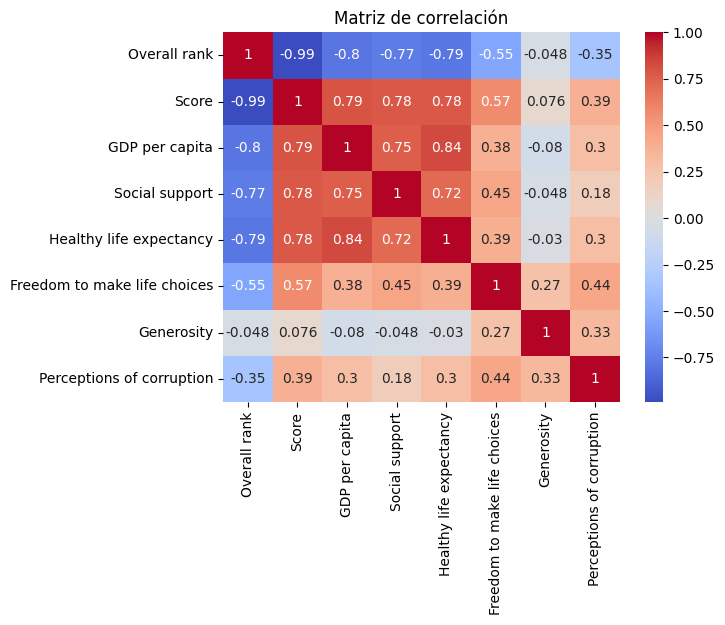

In [34]:
numericas = happiness.select_dtypes(include='number')
sns.heatmap(numericas.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

Combina con el dataframe metada (Metadata.csv) para graficar la felicidad promedio por región.

In [32]:
metadata = pd.read_csv('0.9ep3krj7s1o0.ona2jvufk4mMetadata.csv')
metadata.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName
0,ABW,Latin America & Caribbean,High income,NaN,Aruba
1,AFG,South Asia,Low income,NaN,Afghanistan
2,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola
3,ALB,Europe & Central Asia,Upper middle income,NaN,Albania
4,AND,Europe & Central Asia,High income,NaN,Andorra


In [36]:
happiness_region = pd.merge(happiness, metadata, left_on='Country or region', right_on='TableName')
happiness_region.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Country Code,Region,IncomeGroup,SpecialNotes,TableName
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,FIN,Europe & Central Asia,High income,A simple multiplier is used to convert the nat...,Finland
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,DNK,Europe & Central Asia,High income,NaN,Denmark
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,NOR,Europe & Central Asia,High income,NaN,Norway
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,ISL,Europe & Central Asia,High income,NaN,Iceland
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,NLD,Europe & Central Asia,High income,A simple multiplier is used to convert the nat...,Netherlands


In [42]:
info_region = happiness_region[['Region','Score']].groupby(['Region']).mean()
info_region

,Score
Region,
East Asia & Pacific,5.658769
Europe & Central Asia,6.104174
Latin America & Caribbean,6.007579
Middle East & North Africa,5.757429
North America,7.085000
South Asia,4.526857
Sub-Saharan Africa,4.260000


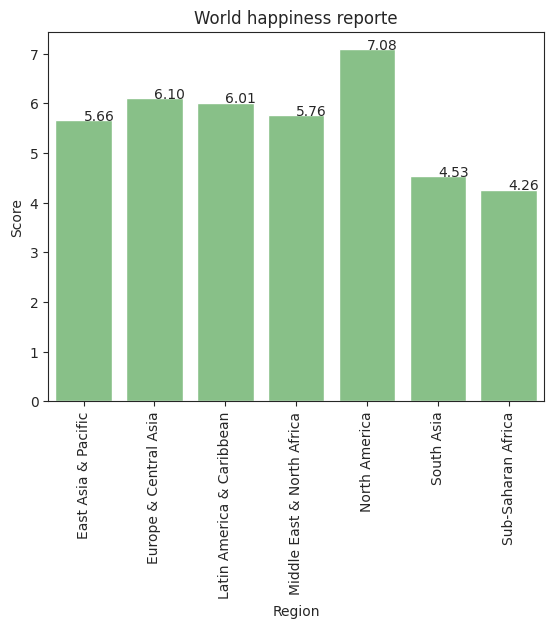

In [49]:
sns.set_palette('Accent')
sns.barplot(x='Region', y='Score', data=info_region)

plt.title('World happiness reporte')
plt.xlabel('Region')
plt.ylabel('Score')
plt.xticks(rotation=90)

for i in range(info_region.shape[0]):
  plt.text(i,info_region.iloc[i,0],str(f'{info_region.iloc[i,0]:.2f}'))

Descarga tu script (archivo .ipynb) y nómbralo de la siguiente manera: DS_C3_SC1_NOMBRE.
Sube el archivo a Github.
Coloca en la plataforma el enlace generado como evidencia de tu actividad.